## Implementation Of Regression ML

In [1]:
file = r''
target = ''

In [2]:
# Parameters
file = "Breast cancer.csv"
target = "info"


In [3]:
# Parameters
file = "Breast cancer.csv"
target = "qvalue"


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dabl
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv(rf'{file}')



# print(types)
#Exploratory Data analysis¶




E:\MIT\OncoOmics_portal\ML\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


### Automated Cleaning

In [5]:
df_clean = dabl.clean(df)[::10]
df_clean

,gene,transcript,score,pvalue,qvalue,info
0,CDH1,ENST00000261769,0.021,0.8248,0.9915,oncogene
10,RUNX1,ENST00000300305,0.075,0.2058,0.8136,oncogene
20,SF3B1,ENST00000335508,0.671,0.0000,0.0000,oncogene
30,FANCD2,ENST00000287647,0.048,0.4281,0.9036,oncogene
40,MED23,ENST00000368068,0.087,0.1482,0.7928,oncogene
...,...,...,...,...,...,...
43750,IGHV1-69,ENST00000390633,0.011,0.9995,1.0000,oncogene
43760,KIAA0125,ENST00000429431,0.011,0.9995,1.0000,oncogene
43770,TMEM212,ENST00000334567,0.010,0.9997,1.0000,oncogene
43780,C22orf29,ENST00000405640,0.009,0.9999,1.0000,oncogene


### Types detected in the input csv

In [6]:
#type of data
types = dabl.detect_types(df_clean)
print(f'Detected types in the csv: {types}')

Detected types in the csv:             continuous  dirty_float  low_card_int  categorical   date  \
gene             False        False         False        False  False   
transcript       False        False         False        False  False   
score             True        False         False        False  False   
pvalue            True        False         False        False  False   
qvalue            True        False         False        False  False   
info             False        False         False         True  False   

            free_string  useless  
gene               True    False  
transcript         True    False  
score             False    False  
pvalue            False    False  
qvalue            False    False  
info              False    False  


### EDA 

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=3.62E+04'}, xlabel='score', ylabel='qvalue'>,
         <AxesSubplot:title={'center':'F=3.46E+04'}, xlabel='pvalue'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=3.08E-01'}, xlabel='qvalue', ylabel='info'>]],
       dtype=object)]

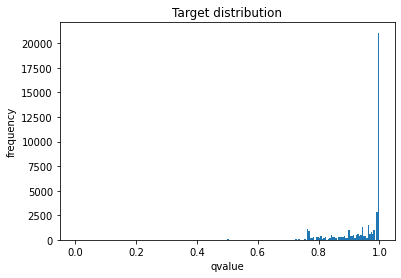

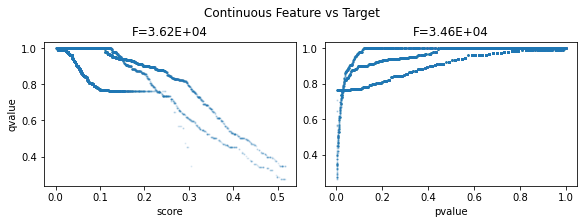

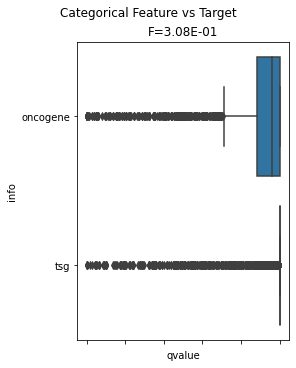

In [7]:
dabl.plot(df, target_col=target)

## ML Regression model

In [8]:
x = df.drop(target, axis=1)
y =df[target]
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

#split data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

#Run model
from flaml import AutoML
automl = AutoML()
automl.fit(x_train, y_train, task="regression")

[flaml.automl: 10-29 23:23:00] {1463} INFO - Data split method: uniform


[flaml.automl: 10-29 23:23:00] {1467} INFO - Evaluation method: holdout


[flaml.automl: 10-29 23:23:00] {1515} INFO - Minimizing error metric: 1-r2


[flaml.automl: 10-29 23:23:00] {1552} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree']


[flaml.automl: 10-29 23:23:00] {1793} INFO - iteration 0, current learner lgbm


[flaml.automl: 10-29 23:23:01] {1910} INFO - Estimated sufficient time budget=6255s. Estimated necessary time budget=6s.


[flaml.automl: 10-29 23:23:01] {1981} INFO -  at 1.2s,	estimator lgbm's best error=0.5781,	best estimator lgbm's best error=0.5781


[flaml.automl: 10-29 23:23:01] {1793} INFO - iteration 1, current learner lgbm


[flaml.automl: 10-29 23:23:01] {1981} INFO -  at 1.6s,	estimator lgbm's best error=0.5781,	best estimator lgbm's best error=0.5781


[flaml.automl: 10-29 23:23:01] {1793} INFO - iteration 2, current learner lgbm


[flaml.automl: 10-29 23:23:02] {1981} INFO -  at 2.0s,	estimator lgbm's best error=0.2565,	best estimator lgbm's best error=0.2565


[flaml.automl: 10-29 23:23:02] {1793} INFO - iteration 3, current learner lgbm


[flaml.automl: 10-29 23:23:02] {1981} INFO -  at 2.5s,	estimator lgbm's best error=0.0224,	best estimator lgbm's best error=0.0224


[flaml.automl: 10-29 23:23:02] {1793} INFO - iteration 4, current learner lgbm


[flaml.automl: 10-29 23:23:03] {1981} INFO -  at 2.9s,	estimator lgbm's best error=0.0224,	best estimator lgbm's best error=0.0224


[flaml.automl: 10-29 23:23:03] {1793} INFO - iteration 5, current learner lgbm


[flaml.automl: 10-29 23:23:03] {1981} INFO -  at 3.4s,	estimator lgbm's best error=0.0106,	best estimator lgbm's best error=0.0106


[flaml.automl: 10-29 23:23:03] {1793} INFO - iteration 6, current learner lgbm


[flaml.automl: 10-29 23:23:04] {1981} INFO -  at 4.0s,	estimator lgbm's best error=0.0106,	best estimator lgbm's best error=0.0106


[flaml.automl: 10-29 23:23:04] {1793} INFO - iteration 7, current learner lgbm


[flaml.automl: 10-29 23:23:04] {1981} INFO -  at 4.3s,	estimator lgbm's best error=0.0106,	best estimator lgbm's best error=0.0106


[flaml.automl: 10-29 23:23:04] {1793} INFO - iteration 8, current learner lgbm


[flaml.automl: 10-29 23:23:05] {1981} INFO -  at 5.0s,	estimator lgbm's best error=0.0059,	best estimator lgbm's best error=0.0059


[flaml.automl: 10-29 23:23:05] {1793} INFO - iteration 9, current learner xgboost


[flaml.automl: 10-29 23:23:06] {1981} INFO -  at 6.6s,	estimator xgboost's best error=8.5517,	best estimator lgbm's best error=0.0059


[flaml.automl: 10-29 23:23:06] {1793} INFO - iteration 10, current learner extra_tree


[flaml.automl: 10-29 23:23:06] {1981} INFO -  at 6.8s,	estimator extra_tree's best error=0.3683,	best estimator lgbm's best error=0.0059


[flaml.automl: 10-29 23:23:06] {1793} INFO - iteration 11, current learner extra_tree


[flaml.automl: 10-29 23:23:07] {1981} INFO -  at 6.9s,	estimator extra_tree's best error=0.0196,	best estimator lgbm's best error=0.0059


[flaml.automl: 10-29 23:23:07] {1793} INFO - iteration 12, current learner extra_tree


[flaml.automl: 10-29 23:23:07] {1981} INFO -  at 7.1s,	estimator extra_tree's best error=0.0196,	best estimator lgbm's best error=0.0059


[flaml.automl: 10-29 23:23:07] {1793} INFO - iteration 13, current learner extra_tree


[flaml.automl: 10-29 23:23:07] {1981} INFO -  at 7.3s,	estimator extra_tree's best error=0.0031,	best estimator extra_tree's best error=0.0031


[flaml.automl: 10-29 23:23:07] {1793} INFO - iteration 14, current learner extra_tree


[flaml.automl: 10-29 23:23:07] {1981} INFO -  at 7.6s,	estimator extra_tree's best error=0.0012,	best estimator extra_tree's best error=0.0012


[flaml.automl: 10-29 23:23:07] {1793} INFO - iteration 15, current learner extra_tree


[flaml.automl: 10-29 23:23:08] {1981} INFO -  at 7.9s,	estimator extra_tree's best error=0.0012,	best estimator extra_tree's best error=0.0012


[flaml.automl: 10-29 23:23:08] {1793} INFO - iteration 16, current learner extra_tree


[flaml.automl: 10-29 23:23:08] {1981} INFO -  at 8.2s,	estimator extra_tree's best error=0.0002,	best estimator extra_tree's best error=0.0002


[flaml.automl: 10-29 23:23:08] {1793} INFO - iteration 17, current learner lgbm


[flaml.automl: 10-29 23:23:08] {1981} INFO -  at 8.7s,	estimator lgbm's best error=0.0059,	best estimator extra_tree's best error=0.0002


[flaml.automl: 10-29 23:23:08] {1793} INFO - iteration 18, current learner extra_tree


[flaml.automl: 10-29 23:23:09] {1981} INFO -  at 8.9s,	estimator extra_tree's best error=0.0002,	best estimator extra_tree's best error=0.0002


[flaml.automl: 10-29 23:23:09] {1793} INFO - iteration 19, current learner extra_tree


[flaml.automl: 10-29 23:23:09] {1981} INFO -  at 9.4s,	estimator extra_tree's best error=0.0002,	best estimator extra_tree's best error=0.0002


[flaml.automl: 10-29 23:23:09] {1793} INFO - iteration 20, current learner extra_tree


[flaml.automl: 10-29 23:23:09] {1981} INFO -  at 9.6s,	estimator extra_tree's best error=0.0001,	best estimator extra_tree's best error=0.0001


[flaml.automl: 10-29 23:23:09] {1793} INFO - iteration 21, current learner xgboost


[flaml.automl: 10-29 23:23:09] {1981} INFO -  at 9.8s,	estimator xgboost's best error=8.5517,	best estimator extra_tree's best error=0.0001


[flaml.automl: 10-29 23:23:09] {1793} INFO - iteration 22, current learner xgboost


[flaml.automl: 10-29 23:23:10] {1981} INFO -  at 9.9s,	estimator xgboost's best error=1.9272,	best estimator extra_tree's best error=0.0001


[flaml.automl: 10-29 23:23:10] {1793} INFO - iteration 23, current learner extra_tree


[flaml.automl: 10-29 23:23:10] {1981} INFO -  at 10.1s,	estimator extra_tree's best error=0.0001,	best estimator extra_tree's best error=0.0001


[flaml.automl: 10-29 23:23:10] {1793} INFO - iteration 24, current learner extra_tree


[flaml.automl: 10-29 23:23:10] {1981} INFO -  at 10.5s,	estimator extra_tree's best error=0.0001,	best estimator extra_tree's best error=0.0001


[flaml.automl: 10-29 23:23:10] {1793} INFO - iteration 25, current learner xgboost


[flaml.automl: 10-29 23:23:11] {1981} INFO -  at 11.2s,	estimator xgboost's best error=0.1008,	best estimator extra_tree's best error=0.0001


[flaml.automl: 10-29 23:23:11] {1793} INFO - iteration 26, current learner extra_tree


[flaml.automl: 10-29 23:23:11] {1981} INFO -  at 11.4s,	estimator extra_tree's best error=0.0001,	best estimator extra_tree's best error=0.0001


[flaml.automl: 10-29 23:23:11] {1793} INFO - iteration 27, current learner extra_tree


[flaml.automl: 10-29 23:23:12] {1981} INFO -  at 12.3s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:12] {1793} INFO - iteration 28, current learner extra_tree


[flaml.automl: 10-29 23:23:12] {1981} INFO -  at 12.7s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:12] {1793} INFO - iteration 29, current learner xgboost


[flaml.automl: 10-29 23:23:13] {1981} INFO -  at 12.9s,	estimator xgboost's best error=0.1008,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:13] {1793} INFO - iteration 30, current learner lgbm


[flaml.automl: 10-29 23:23:14] {1981} INFO -  at 14.3s,	estimator lgbm's best error=0.0004,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:14] {1793} INFO - iteration 31, current learner lgbm


[flaml.automl: 10-29 23:23:16] {1981} INFO -  at 16.3s,	estimator lgbm's best error=0.0003,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:16] {1793} INFO - iteration 32, current learner extra_tree


[flaml.automl: 10-29 23:23:17] {1981} INFO -  at 17.3s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:17] {1793} INFO - iteration 33, current learner xgboost


[flaml.automl: 10-29 23:23:17] {1981} INFO -  at 17.5s,	estimator xgboost's best error=0.1008,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:17] {1793} INFO - iteration 34, current learner xgboost


[flaml.automl: 10-29 23:23:18] {1981} INFO -  at 17.8s,	estimator xgboost's best error=0.0234,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:18] {1793} INFO - iteration 35, current learner extra_tree


[flaml.automl: 10-29 23:23:18] {1981} INFO -  at 18.4s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:18] {1793} INFO - iteration 36, current learner extra_tree


[flaml.automl: 10-29 23:23:19] {1981} INFO -  at 19.4s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:19] {1793} INFO - iteration 37, current learner extra_tree


[flaml.automl: 10-29 23:23:20] {1981} INFO -  at 20.3s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:20] {1793} INFO - iteration 38, current learner xgboost


[flaml.automl: 10-29 23:23:20] {1981} INFO -  at 20.7s,	estimator xgboost's best error=0.0160,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:20] {1793} INFO - iteration 39, current learner rf


[flaml.automl: 10-29 23:23:21] {1981} INFO -  at 20.9s,	estimator rf's best error=0.2189,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:21] {1793} INFO - iteration 40, current learner xgboost


[flaml.automl: 10-29 23:23:21] {1981} INFO -  at 21.2s,	estimator xgboost's best error=0.0153,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:21] {1793} INFO - iteration 41, current learner extra_tree


[flaml.automl: 10-29 23:23:22] {1981} INFO -  at 21.9s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:22] {1793} INFO - iteration 42, current learner lgbm


[flaml.automl: 10-29 23:23:23] {1981} INFO -  at 23.3s,	estimator lgbm's best error=0.0003,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:23] {1793} INFO - iteration 43, current learner rf


[flaml.automl: 10-29 23:23:23] {1981} INFO -  at 23.7s,	estimator rf's best error=0.0166,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:23] {1793} INFO - iteration 44, current learner extra_tree


[flaml.automl: 10-29 23:23:25] {1981} INFO -  at 25.1s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:25] {1793} INFO - iteration 45, current learner rf


[flaml.automl: 10-29 23:23:25] {1981} INFO -  at 25.7s,	estimator rf's best error=0.0166,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:25] {1793} INFO - iteration 46, current learner rf


[flaml.automl: 10-29 23:23:26] {1981} INFO -  at 26.7s,	estimator rf's best error=0.0006,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:26] {1793} INFO - iteration 47, current learner extra_tree


[flaml.automl: 10-29 23:23:27] {1981} INFO -  at 27.1s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:27] {1793} INFO - iteration 48, current learner rf


[flaml.automl: 10-29 23:23:27] {1981} INFO -  at 27.7s,	estimator rf's best error=0.0002,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:27] {1793} INFO - iteration 49, current learner rf


[flaml.automl: 10-29 23:23:28] {1981} INFO -  at 28.4s,	estimator rf's best error=0.0002,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:28] {1793} INFO - iteration 50, current learner extra_tree


[flaml.automl: 10-29 23:23:28] {1981} INFO -  at 28.8s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:28] {1793} INFO - iteration 51, current learner rf


[flaml.automl: 10-29 23:23:29] {1981} INFO -  at 29.7s,	estimator rf's best error=0.0002,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:29] {1793} INFO - iteration 52, current learner xgboost


[flaml.automl: 10-29 23:23:30] {1981} INFO -  at 30.0s,	estimator xgboost's best error=0.0031,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:30] {1793} INFO - iteration 53, current learner xgboost


[flaml.automl: 10-29 23:23:30] {1981} INFO -  at 30.2s,	estimator xgboost's best error=0.0031,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:30] {1793} INFO - iteration 54, current learner xgboost


[flaml.automl: 10-29 23:23:30] {1981} INFO -  at 30.4s,	estimator xgboost's best error=0.0031,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:30] {1793} INFO - iteration 55, current learner xgboost


[flaml.automl: 10-29 23:23:31] {1981} INFO -  at 30.9s,	estimator xgboost's best error=0.0025,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:31] {1793} INFO - iteration 56, current learner xgboost


[flaml.automl: 10-29 23:23:31] {1981} INFO -  at 31.1s,	estimator xgboost's best error=0.0025,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:31] {1793} INFO - iteration 57, current learner xgboost


[flaml.automl: 10-29 23:23:32] {1981} INFO -  at 32.0s,	estimator xgboost's best error=0.0025,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:32] {1793} INFO - iteration 58, current learner extra_tree


[flaml.automl: 10-29 23:23:33] {1981} INFO -  at 33.1s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:33] {1793} INFO - iteration 59, current learner lgbm


[flaml.automl: 10-29 23:23:34] {1981} INFO -  at 34.6s,	estimator lgbm's best error=0.0001,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:34] {1793} INFO - iteration 60, current learner xgboost


[flaml.automl: 10-29 23:23:35] {1981} INFO -  at 35.2s,	estimator xgboost's best error=0.0025,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:35] {1793} INFO - iteration 61, current learner lgbm


[flaml.automl: 10-29 23:23:37] {1981} INFO -  at 37.7s,	estimator lgbm's best error=0.0001,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:37] {1793} INFO - iteration 62, current learner extra_tree


[flaml.automl: 10-29 23:23:38] {1981} INFO -  at 38.2s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:38] {1793} INFO - iteration 63, current learner extra_tree


[flaml.automl: 10-29 23:23:38] {1981} INFO -  at 38.6s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:38] {1793} INFO - iteration 64, current learner lgbm


[flaml.automl: 10-29 23:23:40] {1981} INFO -  at 40.7s,	estimator lgbm's best error=0.0001,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:40] {1793} INFO - iteration 65, current learner xgboost


[flaml.automl: 10-29 23:23:41] {1981} INFO -  at 41.4s,	estimator xgboost's best error=0.0025,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:41] {1793} INFO - iteration 66, current learner extra_tree


[flaml.automl: 10-29 23:23:42] {1981} INFO -  at 42.1s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:42] {1793} INFO - iteration 67, current learner xgboost


[flaml.automl: 10-29 23:23:42] {1981} INFO -  at 42.3s,	estimator xgboost's best error=0.0025,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:42] {1793} INFO - iteration 68, current learner lgbm


[flaml.automl: 10-29 23:23:43] {1981} INFO -  at 43.6s,	estimator lgbm's best error=0.0001,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:43] {1793} INFO - iteration 69, current learner extra_tree


[flaml.automl: 10-29 23:23:44] {1981} INFO -  at 43.9s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:44] {1793} INFO - iteration 70, current learner extra_tree


[flaml.automl: 10-29 23:23:44] {1981} INFO -  at 44.3s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:44] {1793} INFO - iteration 71, current learner extra_tree


[flaml.automl: 10-29 23:23:44] {1981} INFO -  at 44.8s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:44] {1793} INFO - iteration 72, current learner extra_tree


[flaml.automl: 10-29 23:23:45] {1981} INFO -  at 45.1s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:45] {1793} INFO - iteration 73, current learner extra_tree


[flaml.automl: 10-29 23:23:46] {1981} INFO -  at 45.8s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:46] {1793} INFO - iteration 74, current learner extra_tree


[flaml.automl: 10-29 23:23:46] {1981} INFO -  at 46.3s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:46] {1793} INFO - iteration 75, current learner lgbm


[flaml.automl: 10-29 23:23:48] {1981} INFO -  at 47.9s,	estimator lgbm's best error=0.0001,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:48] {1793} INFO - iteration 76, current learner lgbm


[flaml.automl: 10-29 23:23:50] {1981} INFO -  at 49.9s,	estimator lgbm's best error=0.0001,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:50] {1793} INFO - iteration 77, current learner extra_tree


[flaml.automl: 10-29 23:23:50] {1981} INFO -  at 50.5s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:50] {1793} INFO - iteration 78, current learner xgboost


[flaml.automl: 10-29 23:23:52] {1981} INFO -  at 52.8s,	estimator xgboost's best error=0.0025,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:52] {1793} INFO - iteration 79, current learner lgbm


[flaml.automl: 10-29 23:23:53] {1981} INFO -  at 53.5s,	estimator lgbm's best error=0.0001,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:53] {1793} INFO - iteration 80, current learner extra_tree


[flaml.automl: 10-29 23:23:54] {1981} INFO -  at 54.5s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:54] {1793} INFO - iteration 81, current learner xgboost


[flaml.automl: 10-29 23:23:54] {1981} INFO -  at 54.8s,	estimator xgboost's best error=0.0025,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:54] {1793} INFO - iteration 82, current learner extra_tree


[flaml.automl: 10-29 23:23:55] {1981} INFO -  at 55.3s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:55] {1793} INFO - iteration 83, current learner extra_tree


[flaml.automl: 10-29 23:23:56] {1981} INFO -  at 55.9s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:56] {1793} INFO - iteration 84, current learner extra_tree


[flaml.automl: 10-29 23:23:58] {1981} INFO -  at 57.8s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:58] {1793} INFO - iteration 85, current learner extra_tree


[flaml.automl: 10-29 23:23:59] {1981} INFO -  at 59.4s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:23:59] {1793} INFO - iteration 86, current learner xgboost


[flaml.automl: 10-29 23:24:02] {1981} INFO -  at 62.4s,	estimator xgboost's best error=0.0025,	best estimator extra_tree's best error=0.0000


[flaml.automl: 10-29 23:24:02] {2087} INFO - selected model: ExtraTreesRegressor(max_features=1.0, max_leaf_nodes=31532, n_estimators=31,
                    n_jobs=-1)


[flaml.automl: 10-29 23:24:03] {2149} INFO - retrain extra_tree for 1.2s


[flaml.automl: 10-29 23:24:03] {2155} INFO - retrained model: ExtraTreesRegressor(max_features=1.0, max_leaf_nodes=31532, n_estimators=31,
                    n_jobs=-1)


[flaml.automl: 10-29 23:24:03] {1576} INFO - fit succeeded


[flaml.automl: 10-29 23:24:03] {1577} INFO - Time taken to find the best model: 54.531593561172485


[flaml.automl: 10-29 23:24:03] {1588} WARNING - Time taken to find the best model is 91% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.


### Best model

In [9]:
# Export the best model
automl.model

### Prediction on test data

In [10]:
y_test_predict = automl.predict(x_test)
y_test_predict

array([1.    , 1.    , 1.    , ..., 0.8136, 0.9639, 0.9915])

### Statistics and Plotting

In [11]:
# r2_score
from sklearn.metrics import r2_score
r2_y_test = r2_score(y_test, y_test_predict)
print(r2_y_test)

0.9998824726061882


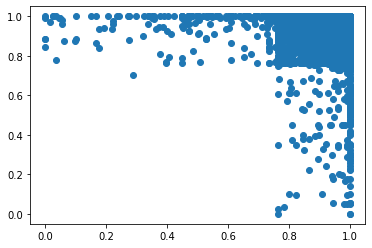

In [12]:
# Visulization
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df =()
# Split data into training and test splits
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
df = 'train'
df = 'test'
plt.scatter(y_test, y_test_predict)
plt.show()